In [22]:
library(qvalue)
library(ggplot2)
library(cowplot)
library(dplyr)

In [1]:
# interaction results

In [2]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/"

In [3]:
########## MOFA 1:10
# results when using MOFA components 1-10 as cell context
file1 = paste0(mydir, "MOFA10/new4/summary.csv")
df1 = read.csv(file1, row.names=1)
nrow(df1)
head(df1,2)

[1] 4470

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,16,0.02606257,16_81118466_A_G,0.02606257
1,ENSG00000011523_CEP68,2,2,0.03995225,2_65279223_C_T,0.07990451


In [5]:
df1$qv = qvalue(df1$pv, pi0 = 1)$qvalue
# significant eQTLs (FDR<5%)
nrow(df1[df1$qv<0.05,])
# significant eGenes (FDR<5%)
length(unique(df1[df1$qv<0.05,"gene"]))

[1] 411

[1] 315

In [49]:
df2 = df1[df1$qv<0.05,]
head(df2[order(df2$pv_raw),])

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
3483,ENSG00000169877_AHSP,2,16,4.441206e-52,16_31522723_T_C,8.882413e-52,1.985219e-48
3484,ENSG00000169877_AHSP,2,16,4.441206e-52,16_31526823_G_A,8.882413e-52,1.985219e-48
207,ENSG00000229150_CRYGEP,2,2,2.649644e-48,2_208977797_G_T,5.299288e-48,7.895939e-45
206,ENSG00000229150_CRYGEP,2,2,1.646080e-46,2_208977362_C_A,3.292161e-46,3.678990e-43
2295,ENSG00000111913_FAM65B,1,6,5.863853e-44,6_24979164_T_A,5.863853e-44,5.242285e-41
268,ENSG00000243566_UPK3B,1,7,1.700073e-29,7_76137375_C_T,1.700073e-29,1.266554e-26


In [8]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [10]:
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [11]:
counts = logcounts(sce)

In [12]:
stats_df = data.frame(gene = rownames(counts), mean = rowMeans(counts), var = rowVars(counts))
head(stats_df)

,gene,mean,var
ENSG00000000003_TSPAN6,ENSG00000000003_TSPAN6,5.4684470,1.169600
ENSG00000000419_DPM1,ENSG00000000419_DPM1,5.6828451,1.736982
ENSG00000000457_SCYL3,ENSG00000000457_SCYL3,0.7900145,1.257087
ENSG00000000460_C1orf112,ENSG00000000460_C1orf112,3.0843196,1.815009
ENSG00000001036_FUCA2,ENSG00000001036_FUCA2,3.5822585,2.486181
ENSG00000001084_GCLC,ENSG00000001084_GCLC,1.7308616,2.491006


In [48]:
stats_df = stats_df[stats_df$gene %in% unique(df1$gene),]
nrow(stats_df)

[1] 3240

In [43]:
stats_df$sign = 'no'
stats_df$sign[stats_df$gene %in% unique(df1[df1$qv<0.05,"gene"])] = 'yes'

In [44]:
p1 = ggplot(stats_df, aes(x = sign, y = mean)) + geom_boxplot() + theme_classic()
p2 = ggplot(stats_df, aes(x = sign, y = var)) + geom_boxplot() + theme_classic()

In [45]:
df3 = inner_join(df1, stats_df)
nrow(df3)

Joining, by = "gene"


[1] 4470

In [46]:
p3 = ggplot(df3, aes(x = mean, y = -log10(qv))) +  geom_point()  + stat_smooth(method = "loess") + theme_classic()

`geom_smooth()` using formula 'y ~ x'


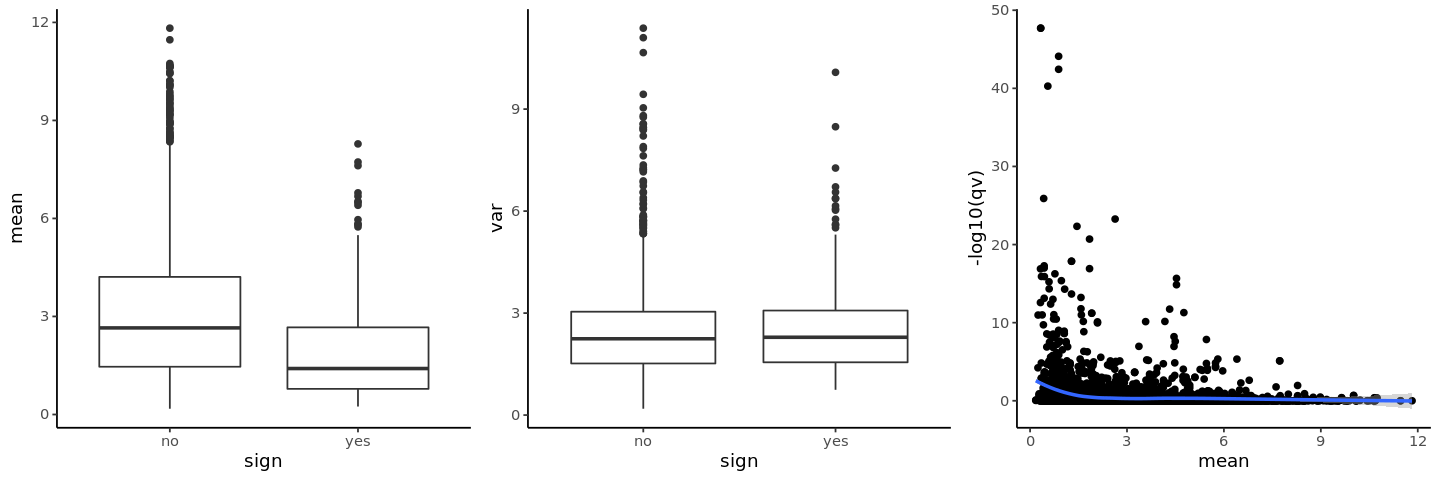

In [47]:
options(repr.plot.width = 12, repr.plot.height = 4)
plot_grid(p1,p2,p3,ncol=3)